In [2]:
import sys
import numpy
import matplotlib
import skimage
import tensorflow as tf  
import cv2
from skimage.transform import resize, rescale 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from skimage import measure  
#import measure.compare_ssim as ssim
from skimage.metrics import structural_similarity as ssim
from matplotlib import pyplot as plt
import cv2
import numpy as np
import math
import os  
import matplotlib.pyplot as plt
import time


In [4]:
srcnn_model = tf.keras.models.load_model('srcnn_model2x.h5')

In [5]:
srcnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, None, None, 128)   10496     
                                                                 
 conv2d_4 (Conv2D)           (None, None, None, 64)    73792     
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 1)     1601      
                                                                 
Total params: 85,889
Trainable params: 85,889
Non-trainable params: 0
_________________________________________________________________


In [18]:
upscale_factor=2
fullimg = cv2.imread("./quarwoman.png", 3) # input shape

print("start image",fullimg.shape)
width = fullimg.shape[0]
height = fullimg.shape[1]
img = fullimg

floatimg = img.astype(np.float32) / 255.0
imgYCbCr = cv2.cvtColor(floatimg, cv2.COLOR_BGR2YCrCb)
imgY = imgYCbCr[:, :, 0]
imgY = np.expand_dims(cv2.resize(imgYCbCr[:, :, 0], None, fx=upscale_factor, fy=upscale_factor, interpolation=cv2.INTER_CUBIC),
                    axis=2)
print("imgY",imgY.shape)

t0= time.time()
LR_input_ = imgY.reshape(1, imgY.shape[0], imgY.shape[1], 1)
t1 = time.time() - t0
print("Time elapsed: ", t1)
Y = srcnn_model.predict([LR_input_])[0]
Cr = np.expand_dims(cv2.resize(imgYCbCr[:, :, 1], None, fx=upscale_factor, fy=upscale_factor, interpolation=cv2.INTER_CUBIC),
                    axis=2)
Cb = np.expand_dims(cv2.resize(imgYCbCr[:, :, 2], None, fx=upscale_factor, fy=upscale_factor, interpolation=cv2.INTER_CUBIC),
                    axis=2)
HR_image_YCrCb = np.concatenate((Y, Cr, Cb), axis=2)

HR_image = ((cv2.cvtColor(HR_image_YCrCb, cv2.COLOR_YCrCb2BGR)) * 255.0).clip(min=0, max=255)
HR_image = (HR_image).astype(np.uint8)
print(HR_image.shape)
cv2.imwrite("./srcnnquarwoman.png", HR_image) # used to save an image to any storage device

start image (86, 57, 3)
imgY (336, 224, 1)
imgY (348, 236, 1)
Time elapsed:  6.413459777832031e-05
1/1 [==============================] - 0s 71ms/step
(336, 224, 3)


True

Text(0.5, 1.0, ' Model ')

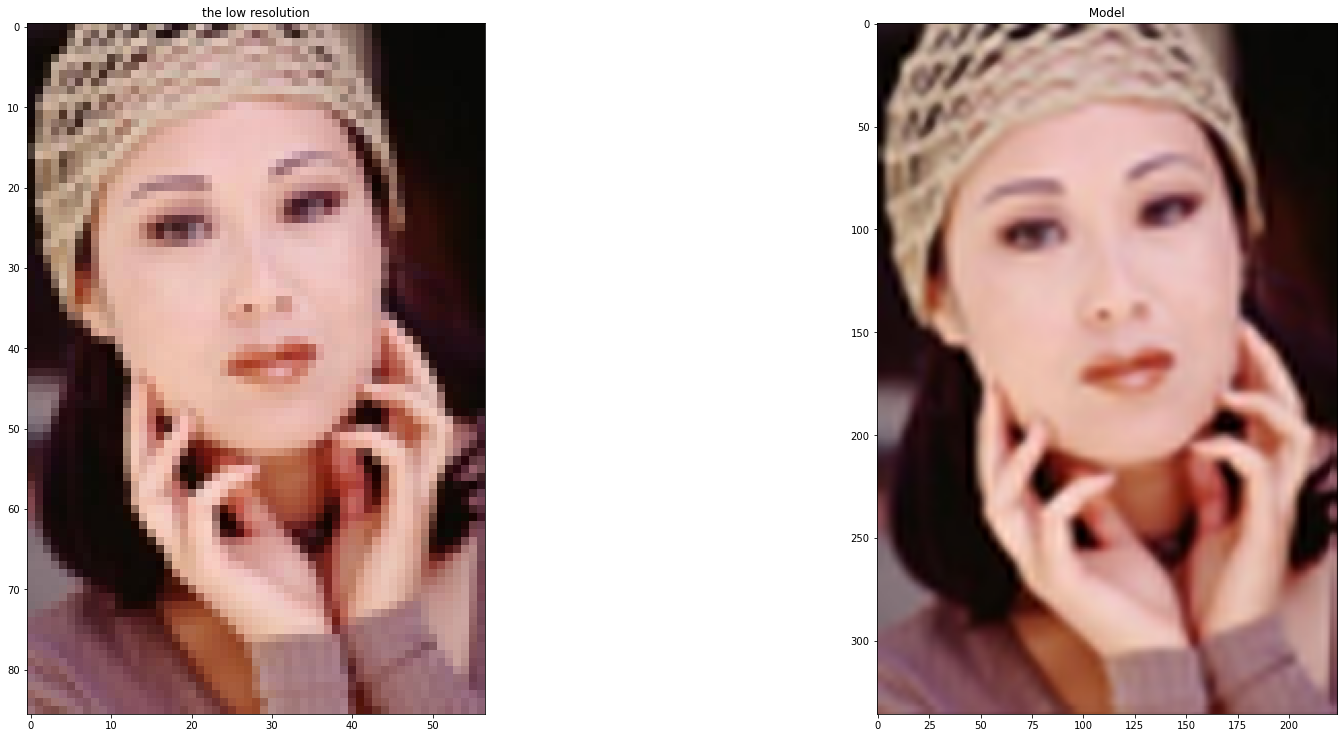

In [16]:
from matplotlib import pyplot as plt
plt.figure(figsize = (150, 150))
i = 1
ax = plt.subplot(10, 10, i)
plt.imshow(cv2.cvtColor(fullimg, cv2.COLOR_BGR2RGB))
plt.title("the low resolution")
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(cv2.cvtColor(HR_image, cv2.COLOR_BGR2RGB))
plt.title(" Model ")

In [38]:
fullimg = cv2.imread("halfN1.jpg", 3)

In [39]:
fullimg.shape

(540, 960, 3)